In [2]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
import os

In [3]:
# Read in data
raw_data = pd.read_csv('/Users/Brian/git/423_avc/2021-msia423-lewis-brian-project/data/bike_stock.csv')
df = raw_data[['station_id', 'date', 'stock']]

In [4]:
# Create list of unique stations
station_list = df.station_id.unique()

# Find highest and lowest variance stations
dict_list = []
for station in station_list:
    subset = df.loc[df['station_id'] == station]
    var_dict = {'station_id': station,
                'variance': subset.stock.var()}
    dict_list.append(var_dict)
    
# Create variance dataframe
variances = pd.DataFrame(dict_list)
print('Max Variance: \n')
print(variances[variances.variance == variances.variance.max()])
print('Min Variance: \n')
print(variances[variances.variance == variances.variance.min()])
print('Med Variance: \n')
print(variances.variance.median())
print(variances[(variances.variance <= (variances.variance.median() + 0.5)) & 
                (variances.variance >= (variances.variance.median() - 0.5 ))])

Max Variance: 

     station_id     variance
360        3141  1783.218471
Min Variance: 

     station_id  variance
269        2005   0.22792
Med Variance: 

49.06931946527311
     station_id   variance
86          316  49.432884
110         346  48.963243
263         540  49.356314
312        3077  49.175396
363        3144  49.446466


In [17]:
# Retrieve location names and coordinates for these station_ids
stations = pd.read_csv('/Users/Brian/git/423_avc/2021-msia423-lewis-brian-project/data/stations.csv')
station_locs = stations[(stations.station_id.isin([3141, 2005, 540]))]

# Print number of unique stations
print('Number of unique bike stations in NYC .json feed: ' + str(len(stations.station_id.unique())))

# Print snapshot of stations of interest
station_locs[['station_id', 'name', 'latitude', 'longitude']]


# As predicted by the Citi Bike blog (https://www.citibikenyc.com/blog/rebalancing-the-citi-bike-system),
# The biggest drain comes from the Upper East Side (station 3141)
# An average type of station can be found in Kips Bay (station 540)
# The least used station is a hard-to-get-to peninsula in Brooklyn (station 2005)

Number of unique bike stations in NYC .json feed: 509


,station_id,name,latitude,longitude
303,540,Lexington Ave & E 29 St,40.743116,-73.982154
311,2005,Railroad Ave & Kay Ave,40.705312,-73.971001
418,3141,1 Ave & E 68 St,40.765005,-73.958185


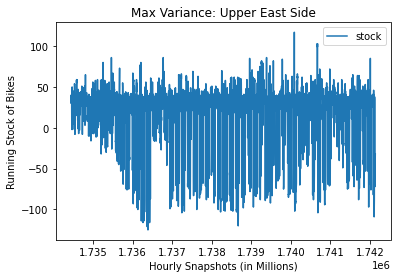

In [11]:
# Subset data for plotting
plot_data_max = df.loc[df['station_id'] == 3141].drop('station_id', axis = 1)
plot_data_max.plot()
plt.title('Max Variance: Upper East Side')
plt.xlabel('Hourly Snapshots (in Millions)')
plt.ylabel('Running Stock of Bikes')
plt.savefig('/Users/Brian/git/423_avc/2021-msia423-lewis-brian-project/figures/max_variance.png', 
            facecolor='white', transparent=False)
plt.show()

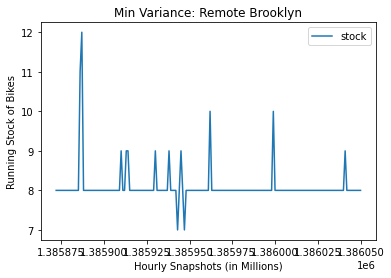

In [12]:
# Subset data for plotting min variance
plot_data_min = df.loc[df['station_id'] == 2005].drop('station_id', axis = 1)
plot_data_min.plot()
plt.title('Min Variance: Remote Brooklyn')
plt.xlabel('Hourly Snapshots (in Millions)')
plt.ylabel('Running Stock of Bikes')
plt.savefig('/Users/Brian/git/423_avc/2021-msia423-lewis-brian-project/figures/min_variance.png', 
            facecolor='white', transparent=False)
plt.show()

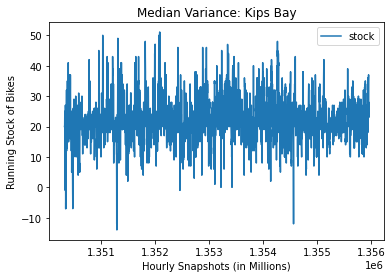

In [13]:
# Subset data for plotting min variance
plot_data_med = df.loc[df['station_id'] == 540].drop('station_id', axis = 1)
plot_data_med.plot()
plt.title('Median Variance: Kips Bay')
plt.xlabel('Hourly Snapshots (in Millions)')
plt.ylabel('Running Stock of Bikes')
plt.savefig('/Users/Brian/git/423_avc/2021-msia423-lewis-brian-project/figures/med_variance.png', 
            facecolor='white', transparent=False)
plt.show()